Image Related problem Staement:
    i. Image Classification
    ii. Detection
    iii. Recognition
    iv. Image Localization
    
1 . Feature:
    1. Feature extratuction
    2. Featuren engineering 
    3. Featuren Importance
    
Note: We will get pixel info, color info, object info from above three feature

Mathematicals terms
Error calculate
Distance calculate[Manhattan distance]
Min-Max[Can be,  Normalization/ value figure out ]



Statistical terms
meann
meadian
mode
std -->variance

MLE


matrix smiliarity

Solve method:
    tensorflow
    pytorch
    mxnet [tensorflow + pytorch packages ] 
    
    scikit-learn [work for matrix]
    

Transformer [Image related work]





    

In [202]:
# import tensorflow 
import tensorflow as tf
import os 
import cv2 
import imghdr # determine type of the image
import numpy as np
from tensorflow.keras.layers import Dense, MaxPooling2D, Flatten, Dropout, Conv2D, BatchNormalization
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')


In [203]:
image_extension = ['jpeg', 'jpg', 'png', 'bmp' ]

In [204]:
os.listdir("../input/image-classification/data/")

['sad', 'happy']

In [205]:
# cv2.imread("../input/imageclassification/data/happy/10-Habits-of-Happy-People-Seniors-Today.jpg")

In [206]:
# datasets_dir='../input/imageclassification/data/'
# os.listdir(os.path.join(datasets_dir, "happy"))


In [207]:
datasets_dir= "../input/image-classification/data/"

for imageClassnames in os.listdir(datasets_dir):
    for individualImage in os.listdir(os.path.join(datasets_dir, imageClassnames)):
        imagePath = os.path.join(datasets_dir, imageClassnames, individualImage)
        # Exception handelling 
        try:
            image = cv2.imread(imagePath)
            imageTag = imghdr.what(imagePath)
            if imageTag not in image_extension:
                print("Image Extention Is Not Right {}".format(imagePath))
                os.remove(imagePath)
        
        except Exception as e:
            print("The main issue is {} here,  Please solve this issue".format (imagePath))
          

In [208]:
datasets = tf.keras.utils.image_dataset_from_directory(datasets_dir)

Found 305 files belonging to 2 classes.


In [209]:
datasets_iterate = datasets.as_numpy_iterator()

In [210]:
datasets_batch = datasets_iterate.next()

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


In [211]:
# datasets_batch[0][0]

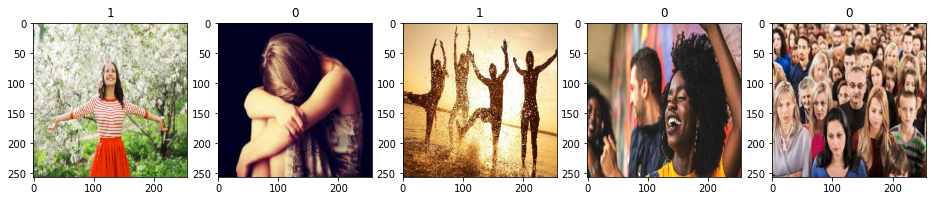

In [212]:
# fig, ax = plt.subplots(ncols=5,figsize = (16,16))
# for idx, image in enumerate(datasets_batch[0][20:25]):
#     ax[idx].imshow(image.astype('int'))
#     ax[idx].title.set_text(datasets_batch[1][idx])

fig, ax = plt.subplots(ncols=5,figsize = (16,16))
for idx, image in enumerate(datasets_batch[0][20:25]):
    ax[idx].imshow(image.astype('int'))
    ax[idx].title.set_text(datasets_batch[1][idx])

In [213]:
def randomImageshow():
    datasets_batch = datasets_iterate.next()
    fig, ax = plt.subplots(ncols=5, figsize= (16, 16))
    for idx, image in enumerate(datasets_batch[0][20:25]):
        ax[idx].imshow(image.astype('int'))
        ax[idx].title.set_text(datasets_batch[1][idx])
        

Cleanup called...


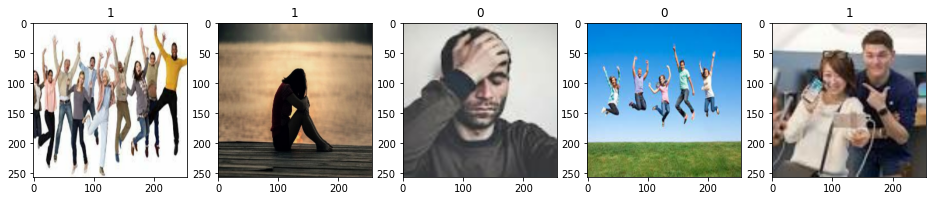

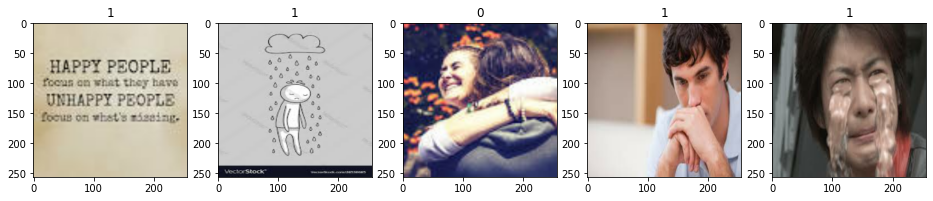

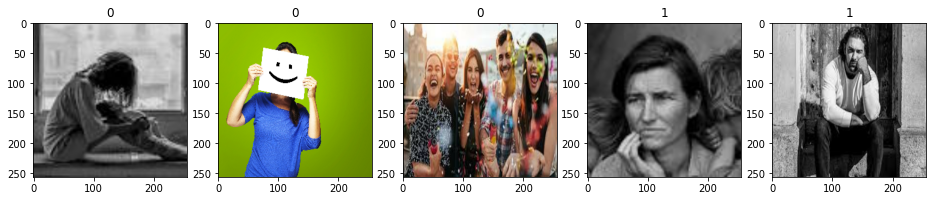

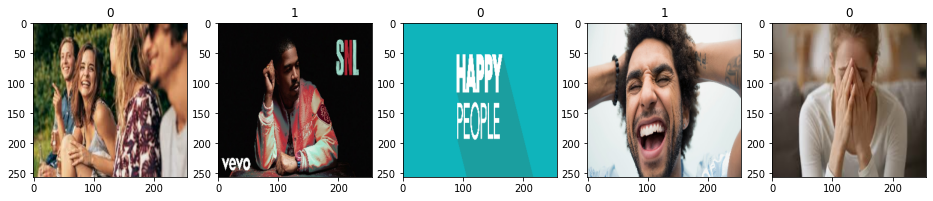

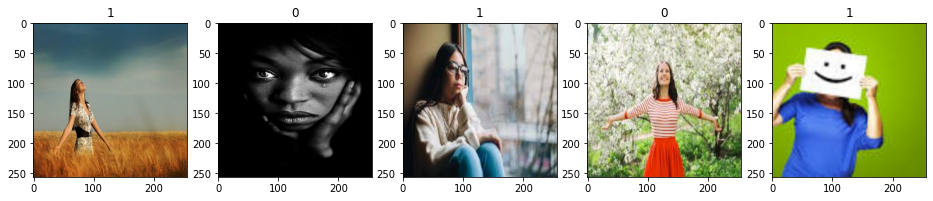

In [214]:
# randomImageshow()

for i in range(5):
    randomImageshow()

In [215]:
datasetsScalling =datasets.map(lambda x, y: (x/255, y))

In [216]:
datasetsScalling.as_numpy_iterator().next()

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


(array([[[[0.08583793, 0.12127757, 0.23587623],
          [0.0723269 , 0.11285233, 0.25447303],
          [0.05271906, 0.10660999, 0.28235295],
          ...,
          [0.1279565 , 0.1279565 , 0.2769761 ],
          [0.12941177, 0.12941177, 0.2714614 ],
          [0.12941177, 0.12941177, 0.27058825]],
 
         [[0.08583793, 0.11662266, 0.22897713],
          [0.07282658, 0.10387561, 0.24325214],
          [0.06012222, 0.09804967, 0.27029926],
          ...,
          [0.12612872, 0.12571232, 0.27556473],
          [0.12716758, 0.12716758, 0.26921722],
          [0.12716758, 0.12716758, 0.26834404]],
 
         [[0.09159287, 0.115437  , 0.22269455],
          [0.08308484, 0.10066916, 0.23348859],
          [0.08546917, 0.09615503, 0.25874773],
          ...,
          [0.12497147, 0.12220091, 0.27359277],
          [0.1254902 , 0.12323835, 0.26841506],
          [0.1254902 , 0.12323835, 0.26779258]],
 
         ...,
 
         [[0.1102405 , 0.13376991, 0.2749464 ],
          [0.10590

In [217]:
trainCategory = int(len(datasetsScalling)*0.7)
testingCate = int(len(datasetsScalling)*0.2)
validationCat = int(len(datasetsScalling)*0.1)


In [218]:
train = datasetsScalling.take(trainCategory)
valid = datasetsScalling.skip(trainCategory).take(validationCat)
test = datasetsScalling.skip(trainCategory+validationCat).take(testingCate)

In [219]:
model  =Sequential()
# input Layer
model.add(Conv2D(16, kernel_size=(3, 3), strides=1,  activation='relu', input_shape = (256, 256, 3)))
model.add(MaxPooling2D())

# model.add(MaxPooling2D(pool_size = (2, 2)))
# model.add(BatchNormalization())
# model.add(Dropout(0.3))

#1st Hiddem Layer
model.add(Conv2D(32, kernel_size=(3, 3), strides=1, activation='relu'))
model.add(MaxPooling2D())
          
#2nd Hidden Layer
model.add(Conv2D(64, kernel_size=(3, 3), strides=1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())  #Bridge Layer

# Connected Layer or Output Layer 
model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation = "sigmoid"))

In [220]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 57600)            

In [221]:
model.compile(optimizer='adam',
             loss = "BinaryCrossentropy",
             metrics=['accuracy'])

In [222]:
# os.makedirs("../working/logs")

In [223]:
log_dir = "../working/logs"

In [224]:
tensboard = tf.keras.callbacks.TensorBoard(log_dir = log_dir)

2022-11-13 10:58:37.450747: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-11-13 10:58:37.450789: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-11-13 10:58:37.744037: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-11-13 10:58:37.744265: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed


In [225]:
history = model.fit(train,
                   epochs=20,
                   validation_data=valid,
                   callbacks=[tensboard])

Epoch 1/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


1/7 [===>..........................] - ETA: 16s - loss: 0.7125 - accuracy: 0.5000

Cleanup called...
2022-11-13 10:58:40.795747: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-11-13 10:58:40.796137: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.


2/7 [=======>......................] - ETA: 3s - loss: 3.2942 - accuracy: 0.4688 

Cleanup called...
2022-11-13 10:58:41.459663: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-11-13 10:58:41.460134: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed


4/7 [================>.............] - ETA: 0s - loss: 2.5041 - accuracy: 0.5000

2022-11-13 10:58:41.613481: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:673]  GpuTracer has collected 141 callback api events and 138 activity events. 
2022-11-13 10:58:41.619492: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-11-13 10:58:41.627853: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ../working/logs/train/plugins/profile/2022_11_13_10_58_41

2022-11-13 10:58:41.633611: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to ../working/logs/train/plugins/profile/2022_11_13_10_58_41/db23155ac372.trace.json.gz
2022-11-13 10:58:41.641999: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ../working/logs/train/plugins/profile/2022_11_13_10_58_41

2022-11-13 10:58:41.643985: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for memory_profile.json.gz to ../working/logs/train/plugins

7/7 [==============================] - ETA: 0s - loss: 1.8018 - accuracy: 0.5179

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - 9s 1s/step - loss: 1.8018 - accuracy: 0.5179 - val_loss: 0.6582 - val_accuracy: 0.6250
Epoch 2/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


1/7 [===>..........................] - ETA: 14s - loss: 0.7192 - accuracy: 0.5312

Cleanup called...


4/7 [================>.............] - ETA: 0s - loss: 0.6470 - accuracy: 0.6406

Cleanup called...


6/7 [========================>.....] - ETA: 0s - loss: 0.6519 - accuracy: 0.6250

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - 8s 981ms/step - loss: 0.6496 - accuracy: 0.6339 - val_loss: 0.5748 - val_accuracy: 0.7812
Epoch 3/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


1/7 [===>..........................] - ETA: 17s - loss: 0.5614 - accuracy: 0.8438

Cleanup called...


4/7 [================>.............] - ETA: 0s - loss: 0.5257 - accuracy: 0.7578

Cleanup called...


7/7 [==============================] - ETA: 0s - loss: 0.5470 - accuracy: 0.7500

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - 9s 977ms/step - loss: 0.5470 - accuracy: 0.7500 - val_loss: 0.6190 - val_accuracy: 0.6562
Epoch 4/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


1/7 [===>..........................] - ETA: 15s - loss: 0.5721 - accuracy: 0.6562

Cleanup called...


4/7 [================>.............] - ETA: 0s - loss: 0.5255 - accuracy: 0.7734

Cleanup called...


6/7 [========================>.....] - ETA: 0s - loss: 0.5168 - accuracy: 0.7500

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - 6s 628ms/step - loss: 0.5130 - accuracy: 0.7634 - val_loss: 0.3826 - val_accuracy: 0.8125


Cleanup called...


Epoch 5/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


1/7 [===>..........................] - ETA: 14s - loss: 0.2896 - accuracy: 0.9062

Cleanup called...


4/7 [================>.............] - ETA: 0s - loss: 0.4630 - accuracy: 0.8047

Cleanup called...


7/7 [==============================] - ETA: 0s - loss: 0.4274 - accuracy: 0.7991

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - 8s 979ms/step - loss: 0.4274 - accuracy: 0.7991 - val_loss: 0.4725 - val_accuracy: 0.8438
Epoch 6/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


1/7 [===>..........................] - ETA: 13s - loss: 0.3933 - accuracy: 0.8438

Cleanup called...


3/7 [===========>..................] - ETA: 0s - loss: 0.3586 - accuracy: 0.8854

Cleanup called...


6/7 [========================>.....] - ETA: 0s - loss: 0.3706 - accuracy: 0.8750

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - 6s 669ms/step - loss: 0.3599 - accuracy: 0.8795 - val_loss: 0.2697 - val_accuracy: 0.9688
Epoch 7/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


1/7 [===>..........................] - ETA: 17s - loss: 0.2145 - accuracy: 0.9688

Cleanup called...


4/7 [================>.............] - ETA: 0s - loss: 0.3164 - accuracy: 0.9141

Cleanup called...


6/7 [========================>.....] - ETA: 0s - loss: 0.2996 - accuracy: 0.9219

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - 9s 977ms/step - loss: 0.2848 - accuracy: 0.9241 - val_loss: 0.2236 - val_accuracy: 0.8750
Epoch 8/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


1/7 [===>..........................] - ETA: 15s - loss: 0.2640 - accuracy: 0.8750

Cleanup called...


3/7 [===========>..................] - ETA: 1s - loss: 0.2328 - accuracy: 0.9062

Cleanup called...


7/7 [==============================] - ETA: 0s - loss: 0.1950 - accuracy: 0.9420

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - 9s 977ms/step - loss: 0.1950 - accuracy: 0.9420 - val_loss: 0.1312 - val_accuracy: 0.9688
Epoch 9/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


1/7 [===>..........................] - ETA: 14s - loss: 0.1376 - accuracy: 0.9375

Cleanup called...


3/7 [===========>..................] - ETA: 1s - loss: 0.1648 - accuracy: 0.9479

Cleanup called...


6/7 [========================>.....] - ETA: 0s - loss: 0.1439 - accuracy: 0.9583

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - 6s 632ms/step - loss: 0.1395 - accuracy: 0.9598 - val_loss: 0.0894 - val_accuracy: 0.9688


Cleanup called...


Epoch 10/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


3/7 [===========>..................] - ETA: 1s - loss: 0.0667 - accuracy: 1.0000

Cleanup called...


7/7 [==============================] - ETA: 0s - loss: 0.0677 - accuracy: 0.9911

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - 9s 1s/step - loss: 0.0677 - accuracy: 0.9911 - val_loss: 0.1235 - val_accuracy: 0.9688
Epoch 11/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


1/7 [===>..........................] - ETA: 14s - loss: 0.0198 - accuracy: 1.0000

Cleanup called...


3/7 [===========>..................] - ETA: 1s - loss: 0.0371 - accuracy: 0.9896

Cleanup called...


6/7 [========================>.....] - ETA: 0s - loss: 0.0537 - accuracy: 0.9844

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - 8s 988ms/step - loss: 0.0541 - accuracy: 0.9821 - val_loss: 0.0476 - val_accuracy: 1.0000
Epoch 12/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


1/7 [===>..........................] - ETA: 14s - loss: 0.0138 - accuracy: 1.0000

Cleanup called...


3/7 [===========>..................] - ETA: 1s - loss: 0.0331 - accuracy: 0.9896

Cleanup called...


7/7 [==============================] - ETA: 0s - loss: 0.0395 - accuracy: 0.9911

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - 8s 975ms/step - loss: 0.0395 - accuracy: 0.9911 - val_loss: 0.0127 - val_accuracy: 1.0000
Epoch 13/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


1/7 [===>..........................] - ETA: 14s - loss: 0.0263 - accuracy: 1.0000

Cleanup called...


3/7 [===========>..................] - ETA: 1s - loss: 0.0406 - accuracy: 1.0000

Cleanup called...


7/7 [==============================] - ETA: 0s - loss: 0.0353 - accuracy: 0.9955

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - 8s 980ms/step - loss: 0.0353 - accuracy: 0.9955 - val_loss: 0.0248 - val_accuracy: 1.0000
Epoch 14/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


1/7 [===>..........................] - ETA: 14s - loss: 0.0090 - accuracy: 1.0000

Cleanup called...


3/7 [===========>..................] - ETA: 0s - loss: 0.0413 - accuracy: 0.9792

Cleanup called...


7/7 [==============================] - ETA: 0s - loss: 0.0254 - accuracy: 0.9911

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - 6s 591ms/step - loss: 0.0254 - accuracy: 0.9911 - val_loss: 0.0398 - val_accuracy: 0.9688


Cleanup called...


Epoch 15/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


1/7 [===>..........................] - ETA: 16s - loss: 0.0055 - accuracy: 1.0000

Cleanup called...


4/7 [================>.............] - ETA: 0s - loss: 0.0395 - accuracy: 0.9844

Cleanup called...


6/7 [========================>.....] - ETA: 0s - loss: 0.0402 - accuracy: 0.9844

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - 9s 979ms/step - loss: 0.0366 - accuracy: 0.9866 - val_loss: 0.0165 - val_accuracy: 1.0000
Epoch 16/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


1/7 [===>..........................] - ETA: 15s - loss: 0.0687 - accuracy: 0.9688

Cleanup called...


3/7 [===========>..................] - ETA: 1s - loss: 0.0439 - accuracy: 0.9896

Cleanup called...


6/7 [========================>.....] - ETA: 0s - loss: 0.0268 - accuracy: 0.9948

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - 6s 648ms/step - loss: 0.0261 - accuracy: 0.9955 - val_loss: 0.0091 - val_accuracy: 1.0000


Cleanup called...


Epoch 17/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


1/7 [===>..........................] - ETA: 14s - loss: 0.0146 - accuracy: 1.0000

Cleanup called...


3/7 [===========>..................] - ETA: 1s - loss: 0.0098 - accuracy: 1.0000

Cleanup called...


7/7 [==============================] - ETA: 0s - loss: 0.0104 - accuracy: 1.0000

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - 8s 978ms/step - loss: 0.0104 - accuracy: 1.0000 - val_loss: 0.0251 - val_accuracy: 1.0000
Epoch 18/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


1/7 [===>..........................] - ETA: 14s - loss: 0.0087 - accuracy: 1.0000

Cleanup called...


4/7 [================>.............] - ETA: 0s - loss: 0.0091 - accuracy: 1.0000

Cleanup called...


6/7 [========================>.....] - ETA: 0s - loss: 0.0072 - accuracy: 1.0000

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - 8s 978ms/step - loss: 0.0073 - accuracy: 1.0000 - val_loss: 0.0029 - val_accuracy: 1.0000
Epoch 19/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


1/7 [===>..........................] - ETA: 14s - loss: 0.0077 - accuracy: 1.0000

Cleanup called...


4/7 [================>.............] - ETA: 0s - loss: 0.0039 - accuracy: 1.0000

Cleanup called...


6/7 [========================>.....] - ETA: 0s - loss: 0.0037 - accuracy: 1.0000

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - 8s 975ms/step - loss: 0.0128 - accuracy: 0.9955 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 20/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


1/7 [===>..........................] - ETA: 15s - loss: 0.0022 - accuracy: 1.0000

Cleanup called...


3/7 [===========>..................] - ETA: 1s - loss: 0.0057 - accuracy: 1.0000

Cleanup called...


6/7 [========================>.....] - ETA: 0s - loss: 0.0043 - accuracy: 1.0000

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - 8s 981ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.0532 - val_accuracy: 0.9688


In [226]:
# history.history
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

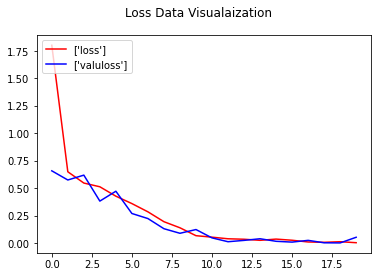

In [227]:
fig = plt.figure()
plt.plot(history.history['loss'],color = 'red', label = ['loss'])
plt.plot(history.history['val_loss'], color = 'blue', label = ['valuloss'])
plt.suptitle("Loss Data Visualaization")
plt.legend(loc = "upper left")
plt.show()

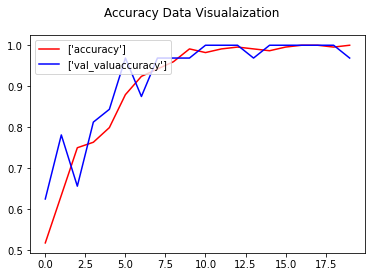

In [228]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color = 'red', label = ['accuracy'])
plt.plot(history.history['val_accuracy'], color = 'blue', label = ['val_valuaccuracy'])
plt.suptitle("Accuracy Data Visualaization")
plt.legend(loc = "upper left")
plt.show()

In [229]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [230]:
Precision_data=Precision()
RecallData=Recall()
BinaryAccuracyData=BinaryAccuracy()

In [231]:
for batch in test.as_numpy_iterator():
    x, y = batch
    yPredict = model.predict(x)
    Precision_data(y, yPredict)
    RecallData(y, yPredict)
    BinaryAccuracyData(y, yPredict)

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


In [234]:
print(Precision_data.result(),"\n", RecallData.result(),"\n", BinaryAccuracyData.result())


tf.Tensor(1.0, shape=(), dtype=float32) 
 tf.Tensor(1.0, shape=(), dtype=float32) 
 tf.Tensor(1.0, shape=(), dtype=float32)


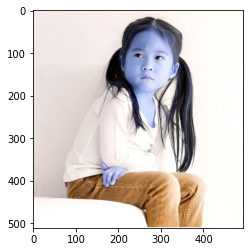

In [246]:
# testImageData = cv2.imread("../input/testsmiledata/Smile.jpg")
testImageData = cv2.imread("../input/sadimagedata/SadImage.jpg")
plt.imshow(testImageData)
plt.show()

In [248]:
testImageData.shape

(511, 494, 3)

In [250]:
resizeImageData =tf.image.resize(testImageData, (256, 256))

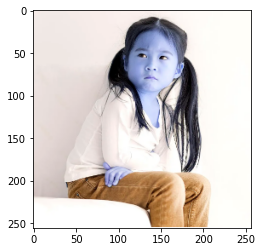

In [251]:
plt.imshow(resizeImageData.numpy().astype('int'))
plt.show()

In [252]:
testImageDataPredict = model.predict(np.expand_dims(resizeImageData/255, 0))


In [253]:
testImageDataPredict

array([[0.9354005]], dtype=float32)

In [258]:
if testImageDataPredict < 0.5:
    print("Happy Image")
else:
    print("sad Image")

sad Image


In [262]:
from tensorflow.keras.models import load_model

In [261]:
models = os.makedirs("../working/models")

In [264]:
modelPath = "../working/models/"

In [266]:
model.save(os.path.join(modelPath, "ModelsInfo.h5"))

In [267]:
modelData = load_model("../working/models/ModelsInfo.h5")

In [268]:
modelData.predict(np.expand_dims(resizeImageData/255, 0))

array([[0.9354005]], dtype=float32)